In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.image as mpimg
import math



from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from IPython.display import Image

In [2]:
#read the files

file1 = "Output/cleanTvshows.csv"

df = pd.read_csv(file1)


In [3]:
df.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18.0,9.5,1,0,0,0,1
1,Stranger Things,2016,16.0,8.8,1,0,0,0,1
2,Money Heist,2017,18.0,8.4,1,0,0,0,1
3,Sherlock,2010,16.0,9.1,1,0,0,0,1
4,Better Call Saul,2015,18.0,8.7,1,0,0,0,1


In [4]:
# add one more column for the type of streaming service
df.insert(9,"Service",'',True)
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,type,Service
0,Breaking Bad,2008,18.0,9.5,1,0,0,0,1,
1,Stranger Things,2016,16.0,8.8,1,0,0,0,1,
2,Money Heist,2017,18.0,8.4,1,0,0,0,1,
3,Sherlock,2010,16.0,9.1,1,0,0,0,1,
4,Better Call Saul,2015,18.0,8.7,1,0,0,0,1,
...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,1,
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,1,
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,1,
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,1,


In [5]:
service = []
for index,row in df.iterrows():
    if (row['Netflix'] == 1) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Netflix')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 1) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Hulu')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 1) & (row['Disney+'] == 0):
        service.append('Prime Video')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 1):
        service.append('Disney+')
    
    else:
        service.append("Multiple")
        
df['Service'] = service


In [6]:
df.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,type,Service
0,Breaking Bad,2008,18.0,9.5,1,0,0,0,1,Netflix
1,Stranger Things,2016,16.0,8.8,1,0,0,0,1,Netflix
2,Money Heist,2017,18.0,8.4,1,0,0,0,1,Netflix
3,Sherlock,2010,16.0,9.1,1,0,0,0,1,Netflix
4,Better Call Saul,2015,18.0,8.7,1,0,0,0,1,Netflix


In [7]:
df.Service.value_counts()

Prime Video    1889
Netflix        1748
Hulu           1452
Multiple        366
Disney+         156
Name: Service, dtype: int64

In [8]:
aveService = df.groupby('Service').IMDb.mean()
aveService

Service
Disney+        6.910959
Hulu           6.992806
Multiple       7.289441
Netflix        7.149786
Prime Video    7.171481
Name: IMDb, dtype: float64

In [11]:
# Create the bins on Age column in which Data will be held  
bins = [0,7, 13, 17, 99]

# Create the names for the five bins
group_names = ["G", "PG", "PG-13", "R"]

In [12]:
df["Age Bin"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)
df

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,type,Service,Age Bin
0,Breaking Bad,2008,18.0,9.5,1,0,0,0,1,Netflix,R
1,Stranger Things,2016,16.0,8.8,1,0,0,0,1,Netflix,PG-13
2,Money Heist,2017,18.0,8.4,1,0,0,0,1,Netflix,R
3,Sherlock,2010,16.0,9.1,1,0,0,0,1,Netflix,PG-13
4,Better Call Saul,2015,18.0,8.7,1,0,0,0,1,Netflix,R
...,...,...,...,...,...,...,...,...,...,...,...
5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,0,0,0,1,1,Disney+,NaN
5607,Paradise Islands,2017,NaN,NaN,0,0,0,1,1,Disney+,NaN
5608,Wild Russia,2018,NaN,NaN,0,0,0,1,1,Disney+,NaN
5609,Love & Vets,2017,NaN,NaN,0,0,0,1,1,Disney+,NaN


#  Bar charts between Age and Services

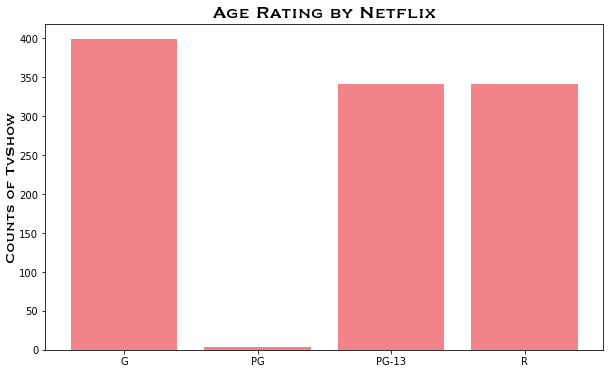

In [41]:
net = df.loc[df.Service == "Netflix"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values, color='#E50914', alpha=0.5, align="center")


# Give our chart some labels and a tile
plt.title("Age Rating by Netflix",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

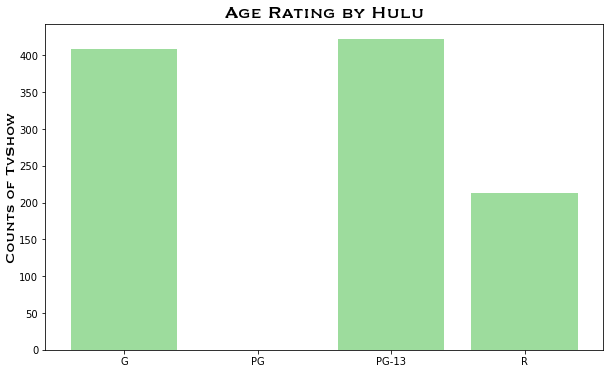

In [42]:
net = df.loc[df.Service == "Hulu"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values, color='#3DBB3D', alpha=0.5, align="center")


# Give our chart some labels and a tile
plt.title("Age Rating by Hulu",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow", fontsize=16, name="Copperplate")

#show/save
plt.show()

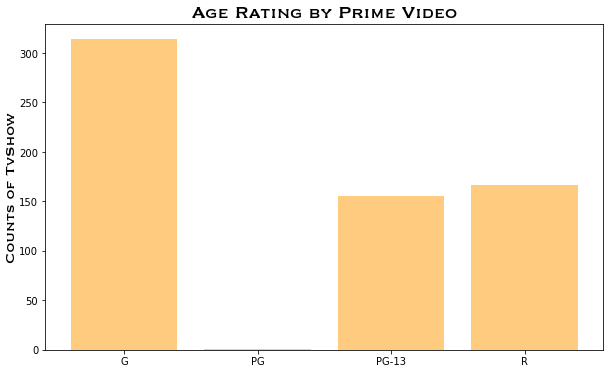

In [43]:
net = df.loc[df.Service == "Prime Video"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values, color='#FF9900', alpha=0.5, align="center")


# Give our chart some labels and a tile
plt.title("Age Rating by Prime Video",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

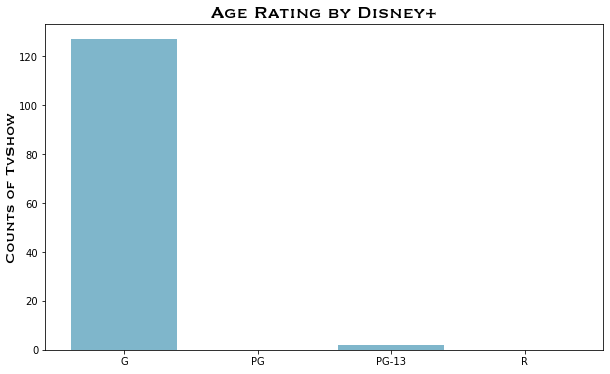

In [44]:
net = df.loc[df.Service == "Disney+"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values, color='#006E99', alpha=0.5, align="center")


# Give our chart some labels and a tile
plt.title("Age Rating by Disney+",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow", fontsize=16, name="Copperplate")

#show/save
plt.show()

# Bar charts between IMDb and Services


In [17]:
countIMDb = net.groupby("IMDb").size()
countIMDb

IMDb
3.5    1
4.6    4
4.8    2
4.9    1
5.0    2
5.2    3
5.4    1
5.5    2
5.6    1
5.7    2
5.8    3
5.9    3
6.0    4
6.1    6
6.2    3
6.3    3
6.4    4
6.5    8
6.6    7
6.7    3
6.8    9
6.9    1
7.0    5
7.1    5
7.2    6
7.3    1
7.4    5
7.5    5
7.6    6
7.7    1
7.8    2
7.9    7
8.0    4
8.1    6
8.2    8
8.3    3
8.4    2
8.5    2
8.6    2
8.7    1
8.8    1
9.1    1
dtype: int64

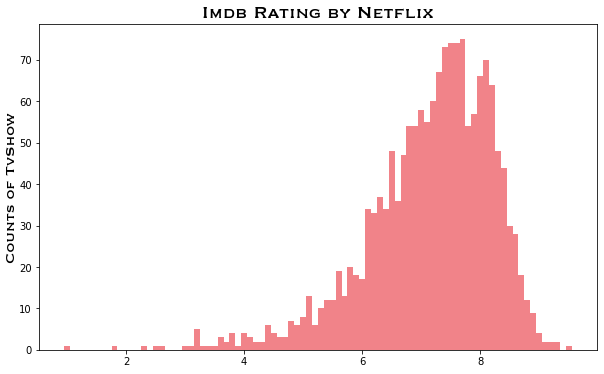

In [45]:
net = df.loc[df.Service == "Netflix"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#E50914', alpha=0.5, align="center",width=0.1)


# Give our chart some labels and a tile
plt.title("Imdb Rating by Netflix",fontweight ="bold",fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

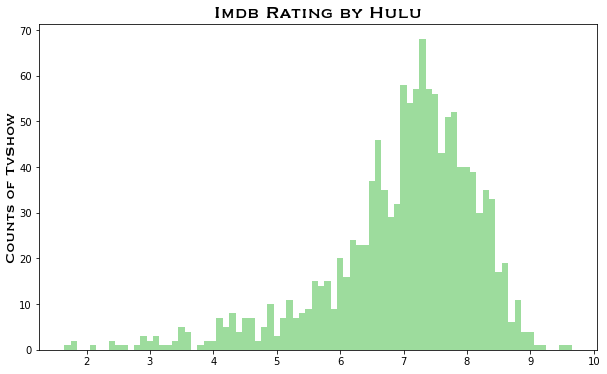

In [46]:
net = df.loc[df.Service == "Hulu"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#3DBB3D', alpha=0.5, align="center",width=0.1)


# Give our chart some labels and a tile
plt.title("Imdb Rating by Hulu",fontweight ="bold",fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

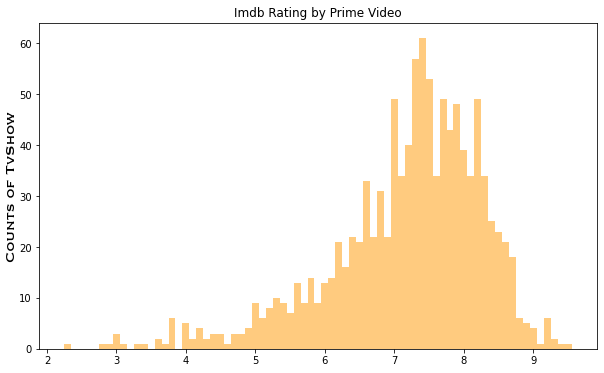

In [47]:
net = df.loc[df.Service == "Prime Video"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#FF9900', alpha=0.5, align="center",width=0.1)


# Give our chart some labels and a tile
plt.title("Imdb Rating by Prime Video")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

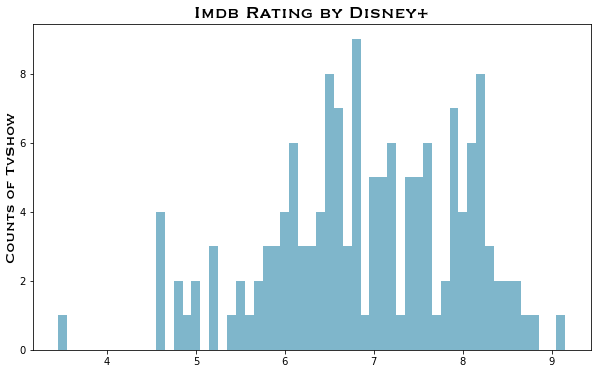

In [48]:
net = df.loc[df.Service == "Disney+"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#006E99', alpha=0.5, align="center",width=0.1)


# Give our chart some labels and a tile
plt.title("Imdb Rating by Disney+",fontweight ="bold",fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

# Line Graphs Year vs Services

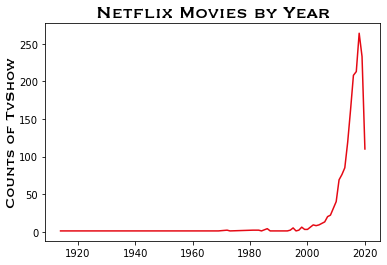

In [49]:
net = df.loc[df.Service == "Netflix"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#E50914')


# Give our chart some labels and a tile
plt.title("Netflix Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow",fontsize=16, name="Copperplate")

#show/save
plt.show()

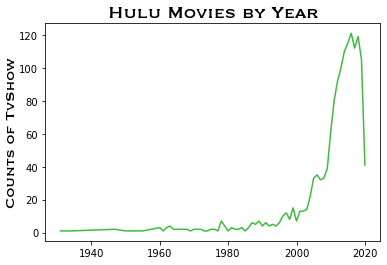

In [50]:
net = df.loc[df.Service == "Hulu"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#3DBB3D')


# Give our chart some labels and a tile
plt.title("Hulu Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow", fontsize=16, name="Copperplate")

#show/save
plt.show()

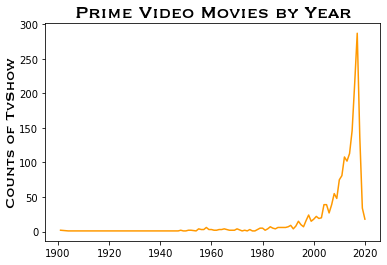

In [51]:
net = df.loc[df.Service == "Prime Video"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#FF9900')


# Give our chart some labels and a tile
plt.title("Prime Video Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow", fontsize=16, name="Copperplate")

#show/save
plt.show()

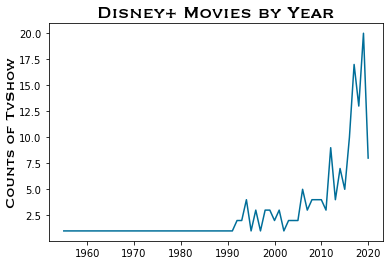

In [53]:
net = df.loc[df.Service == "Disney+"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#006E99')


# Give our chart some labels and a tile
plt.title("Disney+ Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("", fontsize=16, name="Copperplate")
plt.ylabel("Counts of TvShow", fontsize=16, name="Copperplate")

#show/save
plt.show()